In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load the data

In [ ]:
df = pd.DataFrame(pd.read_csv('ETA.csv'))
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


####1. Perform data quality check by checking for missing values if any.

Checking for null values in the dataset

In [ ]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Step 2: Understand Factors Contributing to Employee Turnover by EDA

2.1 Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data.

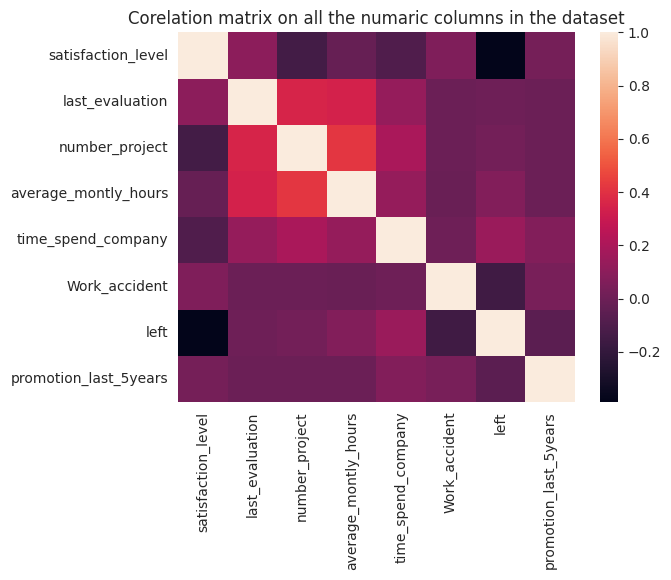

In [ ]:
sns.set_style('darkgrid')
sns.heatmap(df.select_dtypes(include=['number']).corr())
plt.title('Corelation matrix on all the numaric columns in the dataset')
plt.show()

2.2 Draw the distribution plot of
Employee Satisfaction (use column satisfaction_level)
Employee Evaluation (use column last_evaluation)
Employee Average Monthly Hours (use column average_montly_hours)

[]

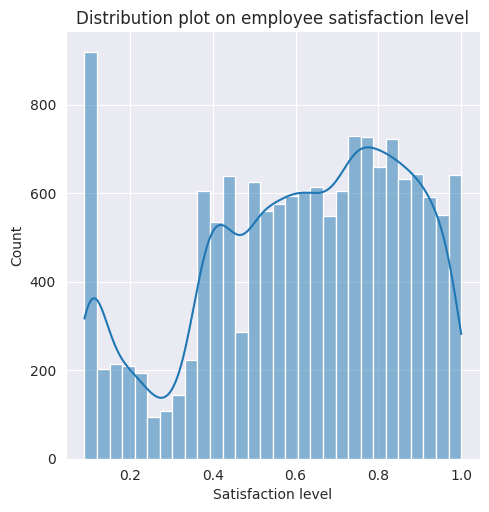

In [ ]:
sns.displot(df['satisfaction_level'],kde=True)
plt.xlabel('Satisfaction level')
plt.title('Distribution plot on employee satisfaction level')
plt.plot()

[]

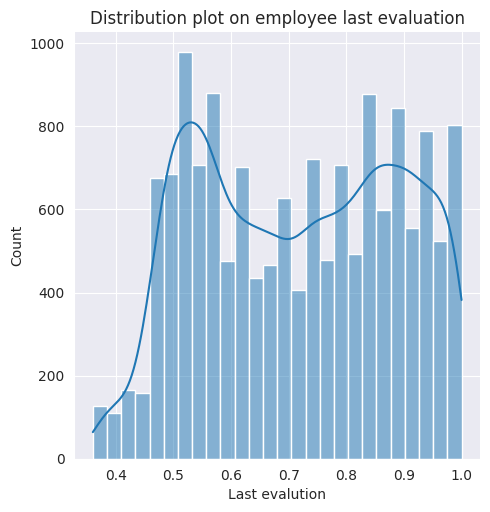

In [ ]:
sns.displot(df['last_evaluation'],kde=True)
plt.xlabel('Last evalution')
plt.title('Distribution plot on employee last evaluation')
plt.plot()

[]

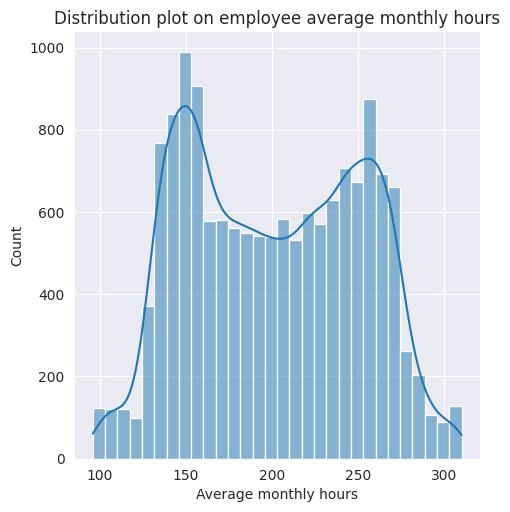

In [ ]:
sns.displot(df['average_montly_hours'],kde=True)
plt.xlabel('Average monthly hours')
plt.title('Distribution plot on employee average monthly hours')
plt.plot()

2.3 Draw the bar plot of Employee Project Count of both employees who left
and who stayed in the organization (use column number_project and hue column left)  and give your inferences from the plot.

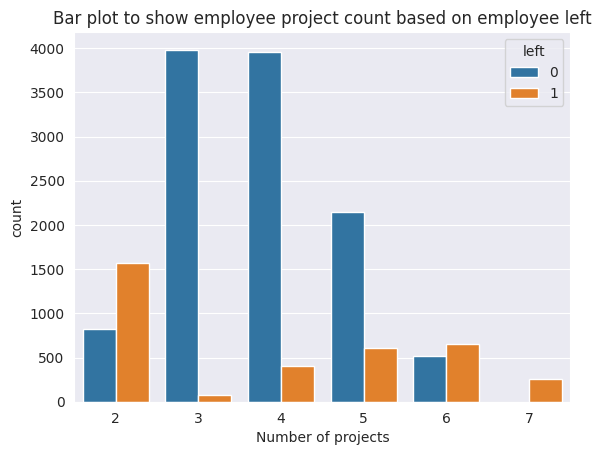

In [ ]:
sns.countplot(x='number_project',data=df,hue='left')
plt.xlabel('Number of projects')
plt.title('Bar plot to show employee project count based on employee left')
plt.show()

After plotting the diagram it can be interpret that when the number of project was only 2 then people who left was more than the people stayed. Bus as the number of project reached 3 and 4 the people who left drastically fallen and who stayed increased very drastically. Then going towards 5,6,7 number of projects stay and left both started to decrease.

### 3.	Perform clustering of Employees who left based on their satisfaction and evaluation.

In [ ]:
#Creating dataset for clustering
emp_left = df[['satisfaction_level','last_evaluation']][df['left']==1].reset_index(drop=True)

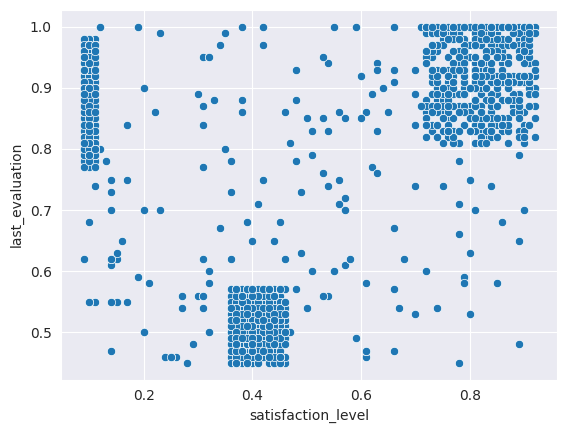

In [ ]:
# Visualizing the data for better understanding
sns.set_style('darkgrid')
sns.scatterplot(x=emp_left['satisfaction_level'],y=emp_left['last_evaluation'],data=emp_left)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,init='k-means++', random_state=42)
emp_left['cluster'] = kmeans.fit_predict(emp_left)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


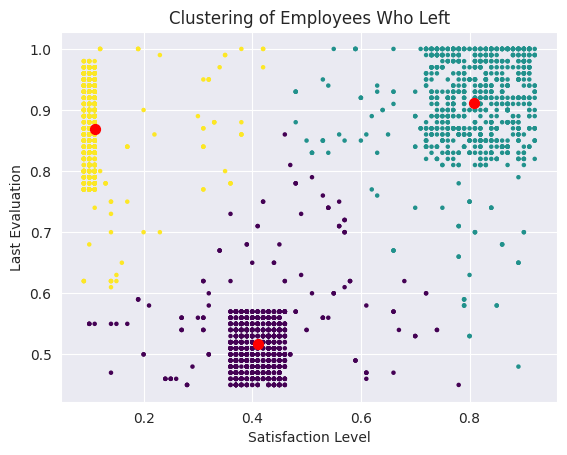

In [ ]:
plt.scatter(emp_left['satisfaction_level'], emp_left['last_evaluation'], c=emp_left['cluster'], cmap='viridis',s=5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'red', label = 'Centroids')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Clustering of Employees Who Left')
plt.show()

After plotting the employee cluster we can say there are 3 major clusters of employee who left the organization. 1. Who are having satisfaction level of around 0.4 and last evalution around 0.5, 2. Satisfaction level around 0.1 and last evalution around 0.8 to 1.0, 3. Those who are having satisfaction level of 0.7 to 0.9 and last evalution of 0.8 to 1.0. Hence we have to analyze those employees in the irganization who are currently having these levels of Satisfaction and last evalution.

### 4.	Handle the left Class Imbalance using SMOTE technique.

4.1 Pre-Process the data by converting categorical columns to numerical columns by Separating categorical variables and numeric variables. Applying get_dummies() to the categorical variables. Combining categorical variables and numeric variables.

In [ ]:
encoaded_data=pd.get_dummies(data=df,columns=['sales','salary'],dtype='int')
x=encoaded_data.drop('left',axis=1)
y=encoaded_data['left']

4.2 Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=123)

4.3 Upsample the train dataset using SMOTE technique from the imblearn module.

In [ ]:
#Applying SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_balanced,y_balanced=smote.fit_resample(x_train,y_train)

In [ ]:
#Print the result (Before and after)
from collections import Counter
print("Before SMOTE:")
print(Counter(y_train))

print("After SMOTE:")
print(Counter(y_balanced))

Before SMOTE:
Counter({0: 9137, 1: 2862})
After SMOTE:
Counter({0: 9137, 1: 9137})


###5.	Perform k-fold cross-validation model training and evaluate performance.

In [ ]:
#Logistic regression with 5-Fold CV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score,cross_validate

5.1 Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report.

In [ ]:
cv_results = cross_validate(LogisticRegression(max_iter=1000,random_state=42), x, y, cv=5, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], return_train_score=False)
model = LogisticRegression(max_iter=1000,random_state=42).fit(x_train,y_train)
logistic_pred = model.predict(x_train)
acc=cv_results['test_accuracy']
prc=cv_results['test_precision_macro']
rec=cv_results['test_recall_macro']
f1=cv_results['test_f1_macro']
scores =[acc,prc,rec,f1]
mean_f1 = np.mean(f1)
std_f1 = np.std(f1)

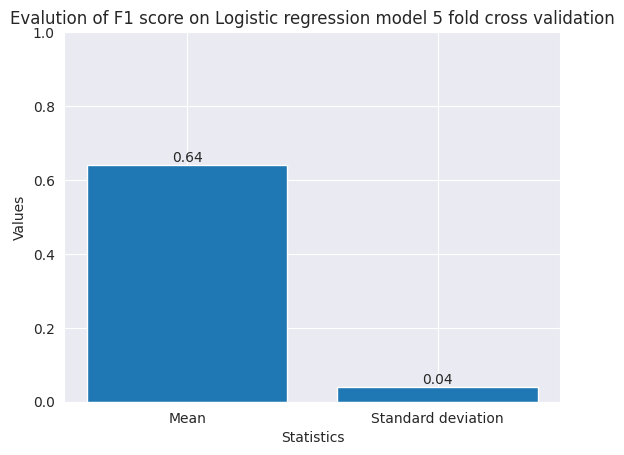

In [ ]:
sns.set_style('darkgrid')
X=['Mean','Standard deviation']
Y=[mean_f1.round(2),std_f1.round(2)]
plt.bar(X,Y)
[plt.text(x, y, str(y), ha='center', va='bottom') for x, y in zip(X,Y)]
plt.ylim(0.0,1.0)
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.title('Evalution of F1 score on Logistic regression model 5 fold cross validation')
plt.show()

5.2 Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report.

In [ ]:
cv_results2 = cross_validate(RandomForestClassifier(n_estimators=100,random_state=42),x,y,cv=5,scoring=['accuracy','precision_macro','recall_macro','f1_macro'],return_train_score=False)
model2 = RandomForestClassifier(n_estimators=100,random_state=42).fit(x_train,y_train)
forest_pred = model2.predict(x_train)
acc2=cv_results2['test_accuracy']
prc2=cv_results2['test_precision_macro']
rec2=cv_results2['test_recall_macro']
f12=cv_results2['test_f1_macro']
mean_f1_1 = np.mean(f12)
std_f1_1 = np.std(f12)

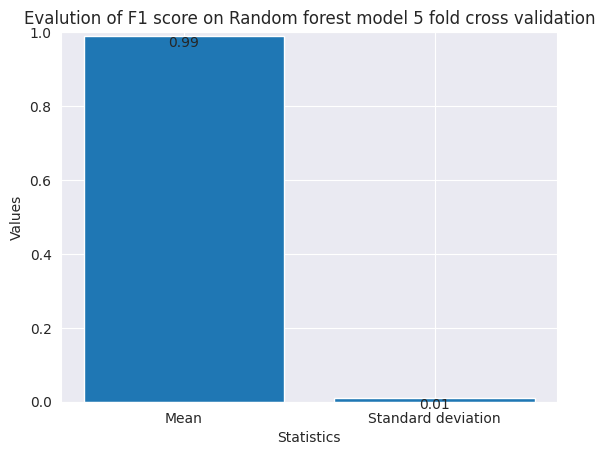

In [ ]:
X2=['Mean','Standard deviation']
Y2=[mean_f1_1.round(2),std_f1_1.round(2)]
plt.bar(X2,Y2)
[plt.text(x, y, str(y), ha='center', va='top') for x, y in zip(X2,Y2)]
plt.ylim(0.0,1.0)
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.title('Evalution of F1 score on Random forest model 5 fold cross validation')
plt.show()

5.3 Train a  Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report.

In [ ]:
cv_results3 = cross_validate(GradientBoostingClassifier(random_state=42),x,y,cv=5,scoring=['accuracy','precision_macro','recall_macro','f1_macro'],return_train_score=False)
model3 = GradientBoostingClassifier(random_state=42).fit(x_train,y_train)
gradient_pred = model3.predict(x_train)
acc3=cv_results3['test_accuracy']
prc3=cv_results3['test_precision_macro']
rec3=cv_results3['test_recall_macro']
f13=cv_results3['test_f1_macro']
mean_f1_2 = np.mean(f13)
std_f1_2 = np.std(f13)

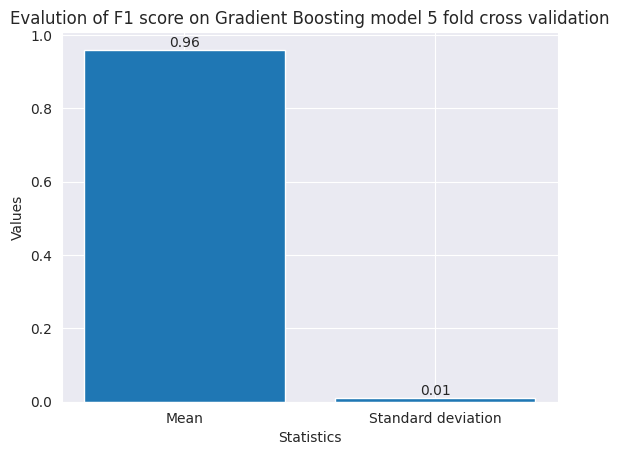

In [ ]:
X3=['Mean','Standard deviation']
Y3=[mean_f1_2.round(2),std_f1_2.round(2)]
plt.bar(X3,Y3)
[plt.text(x, y, str(y), ha='center', va='bottom') for x, y in zip(X3,Y3)]
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.title('Evalution of F1 score on Gradient Boosting model 5 fold cross validation')
plt.show()

###6. Identify the best model and justify the evaluation metrics used.

6.1 Find the ROC/AUC for each model and plot the ROC curve.

Model evalution of Logistic regression

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,threshold = roc_curve(y_train,logistic_pred) #calculate the ROC
auc = roc_auc_score(y_train,logistic_pred) #Calculate the AUC

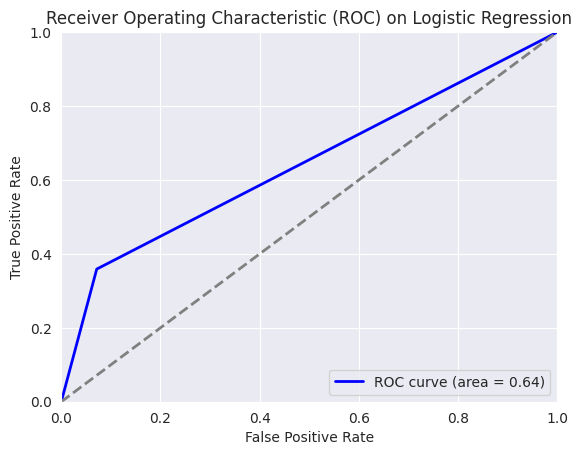

In [ ]:
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) on Logistic Regression')
plt.legend(loc="lower right")
plt.show()

Model evalution on Random Forest classifier

In [ ]:
fpr2,tpr2,threshold2=roc_curve(y_train,forest_pred)
auc2=roc_auc_score(y_train,forest_pred)

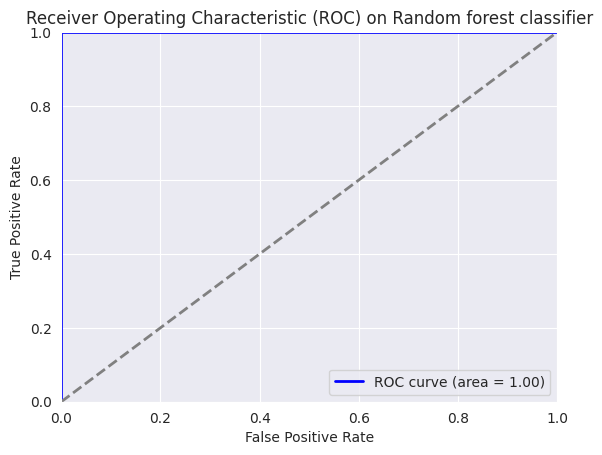

In [ ]:
plt.plot(fpr2, tpr2, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc2)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) on Random forest classifier')
plt.legend(loc="lower right")
plt.show()

Model evalution on Random Gradient Boosting Classifier

In [ ]:
fpr3,tpr3,threshold3=roc_curve(y_train,gradient_pred)
auc3=roc_auc_score(y_train,gradient_pred)

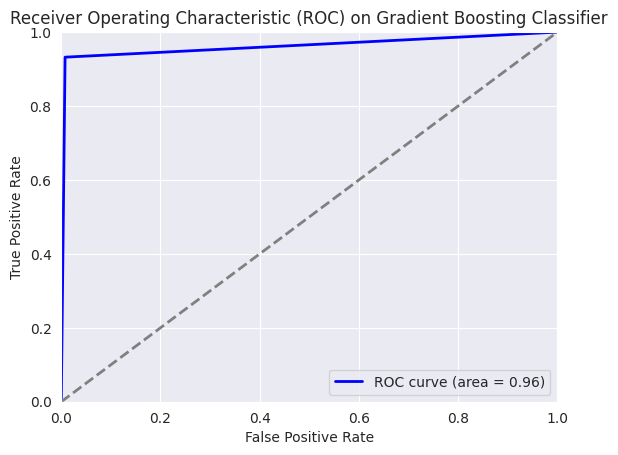

In [ ]:
plt.plot(fpr3, tpr3, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc3)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) on Gradient Boosting Classifier')
plt.legend(loc="lower right")
plt.show()

6.2 Find the confusion matrix for each of the models.

Confusion matrix of Logistic regression model prediction

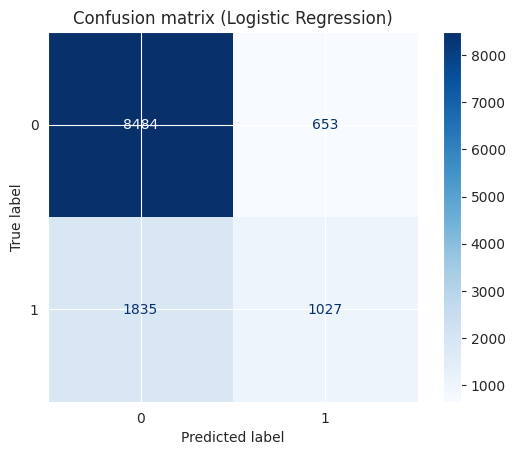

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_train,logistic_pred,labels=model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion matrix (Logistic Regression)')
plt.show()

Confusion matrix of Random Forest Classifier

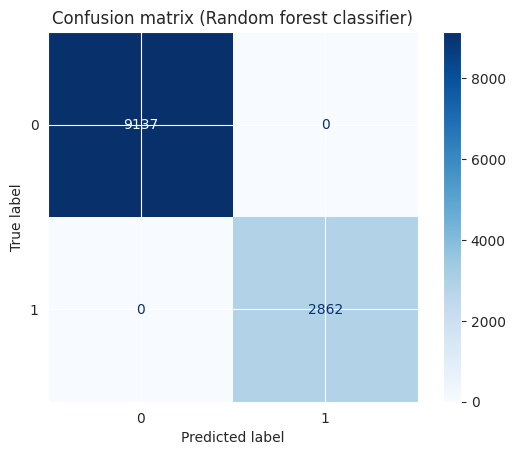

In [ ]:
cm2 = confusion_matrix(y_train,forest_pred,labels=model2.classes_)
disp2=ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=model2.classes_)
disp2.plot(cmap=plt.cm.Blues)
plt.title('Confusion matrix (Random forest classifier)')
plt.show()

Confusion matrix of Gradient boosting Classifier

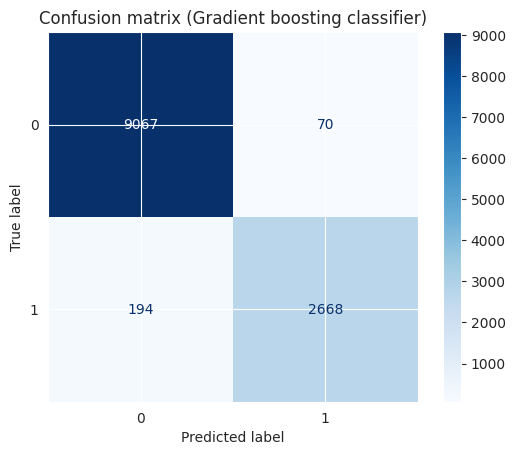

In [ ]:
cm3 = confusion_matrix(y_train,gradient_pred,labels=model3.classes_)
disp3=ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=model3.classes_)
disp3.plot(cmap=plt.cm.Blues)
plt.title('Confusion matrix (Gradient boosting classifier)')
plt.show()

6.3 From the confusion matrix, explain which metric needs to be used- Recall or Precision?

- In this specific problem the recall is more important in the matrix, because here those who are likely to leave the company those should be identified more accurately.

####7. Suggest various retention strategies for targeted employees.

Using the best model, predict the probability of employee turnover in the test data.

In [ ]:
best_model_proba=pd.DataFrame(model2.predict_proba(x_test))
new_test = pd.merge(x_test,best_model_proba, left_index=True, right_index=True)

In [ ]:
new_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,...,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,0,1
2975,0.95,0.61,3,267,2,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0.99,0.01
1567,0.40,0.48,2,132,3,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0.99,0.01
1896,0.39,0.49,2,127,3,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1.00,0.00
603,0.83,0.90,5,245,5,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1.00,0.00
1798,0.11,0.92,7,265,4,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0.97,0.03


In [ ]:
def categorize_zone(prob):
    if prob < 0.20:
        return 'Green'
    elif 0.20 <= prob < 0.60:
        return 'Yellow'
    elif 0.60 <= prob < 0.90:
        return 'Orange'
    else:
        return 'Red'

new_test['risk_zone'] = new_test[1].apply(categorize_zone)

In [ ]:
# Output the categorized data with retention strategies
def retention_strategy(zone):
    if zone == 'Green':
        return 'Maintain current engagement strategies and monitor satisfaction levels.'
    elif zone == 'Yellow':
        return 'Provide additional support, career development opportunities, and recognize their contributions.'
    elif zone == 'Orange':
        return 'Implement targeted retention programs, conduct stay interviews, and address any immediate concerns.'
    elif zone == 'Red':
        return 'Take immediate action to understand individual concerns, offer personalized retention plans, and consider providing incentives.'

new_test['retention_strategy'] = new_test['risk_zone'].apply(retention_strategy)

In [ ]:
new_test[['risk_zone','retention_strategy']]

,risk_zone,retention_strategy
2975,Green,Maintain current engagement strategies and mon...
1567,Green,Maintain current engagement strategies and mon...
1896,Green,Maintain current engagement strategies and mon...
603,Green,Maintain current engagement strategies and mon...
1798,Green,Maintain current engagement strategies and mon...
...,...,...
148,Green,Maintain current engagement strategies and mon...
2755,Orange,"Implement targeted retention programs, conduct..."
808,Green,Maintain current engagement strategies and mon...
2268,Green,Maintain current engagement strategies and mon...
